In [55]:
# importing needed libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#putting data into pandas dataframe
df = pd.read_csv('data.csv')

In [6]:
# lets check the data - as we can see, data is banking financial data taken from kaggle. 
# Head shows first 5 rows - theres no need to load whole data
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [7]:
# I'm checking data types, range index, count of columns
# with help of info we know the shape of data so its 6819 rows with 96 col.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [9]:
# I'm checking if there are some nulls thats need to be handled 

def check_df(dataframe):
    print(dataframe.isnull().sum())
check_df(df)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [12]:
# I want to check if there are columns with only one unique value - they are not useful
# one column has been removed 

df = df.loc[:, df.nunique() != 1]

# It will be easier for me on next steps to have column names with removed spaces
df.columns = df.columns.str.replace(' ', '')
df.head()

,Bankrupt?,ROA(C)beforeinterestanddepreciationbeforeinterest,ROA(A)beforeinterestand%aftertax,ROA(B)beforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,Pre-taxnetInterestRate,After-taxnetInterestRate,Non-industryincomeandexpenditure/revenue,...,Liability-AssetsFlag,NetIncometoTotalAssets,TotalassetstoGNPprice,No-creditInterval,GrossProfittoSales,NetIncometoStockholder'sEquity,LiabilitytoEquity,DegreeofFinancialLeverage(DFL),InterestCoverageRatio(InterestexpensetoEBIT),EquitytoLiability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [14]:
# I want also to check if there are a duplicates in the data

df.duplicated().sum()

0

In [13]:
# checking the basic statistics for a data using describe function

df.describe()

,Bankrupt?,ROA(C)beforeinterestanddepreciationbeforeinterest,ROA(A)beforeinterestand%aftertax,ROA(B)beforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,Pre-taxnetInterestRate,After-taxnetInterestRate,Non-industryincomeandexpenditure/revenue,...,Liability-AssetsFlag,NetIncometoTotalAssets,TotalassetstoGNPprice,No-creditInterval,GrossProfittoSales,NetIncometoStockholder'sEquity,LiabilitytoEquity,DegreeofFinancialLeverage(DFL),InterestCoverageRatio(InterestexpensetoEBIT),EquitytoLiability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.034234,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.000000,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.000000,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.000000,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# I want to check via colum bankrupt - % difference on how many are bankrupt on how many not
print(df['Bankrupt?'].value_counts())
print('-' * 30)
for label, count in zip(["Fin. stable", "Fin. unstable"], df['Bankrupt?'].value_counts(normalize=True) * 100):
    print(f"{label}: {count:.2f}% of the dataset")


Bankrupt?
0    6599
1     220
Name: count, dtype: int64
------------------------------
Fin. stable: 96.77% of the dataset
Fin. unstable: 3.23% of the dataset


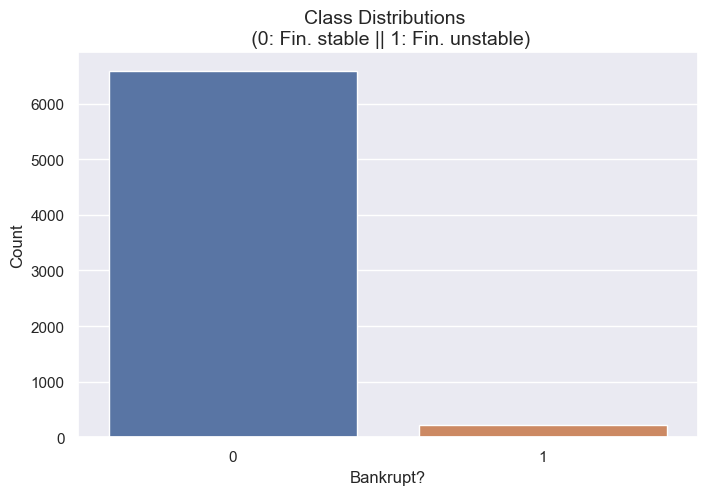

In [37]:
# I'am a visual learner and I love to see the results in visuals so I always take the opportunity to do so

sns.set_theme(context = 'notebook')

plt.figure(figsize=(8, 5))
sns.countplot(x='Bankrupt?', data=df)
plt.title('Class Distributions \n (0: Fin. stable || 1: Fin. unstable)', fontsize=14)
plt.xlabel('Bankrupt?', fontsize=12)  # Add x-axis label
plt.ylabel('Count', fontsize=12)  # Add y-axis label
plt.show()

In [43]:
#Exploratory Data Analysis

from sklearn.datasets import load_iris
iris = load_iris()


df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'], random_state=0)


In [44]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [45]:
y_pred = clf.predict(X_test)

In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


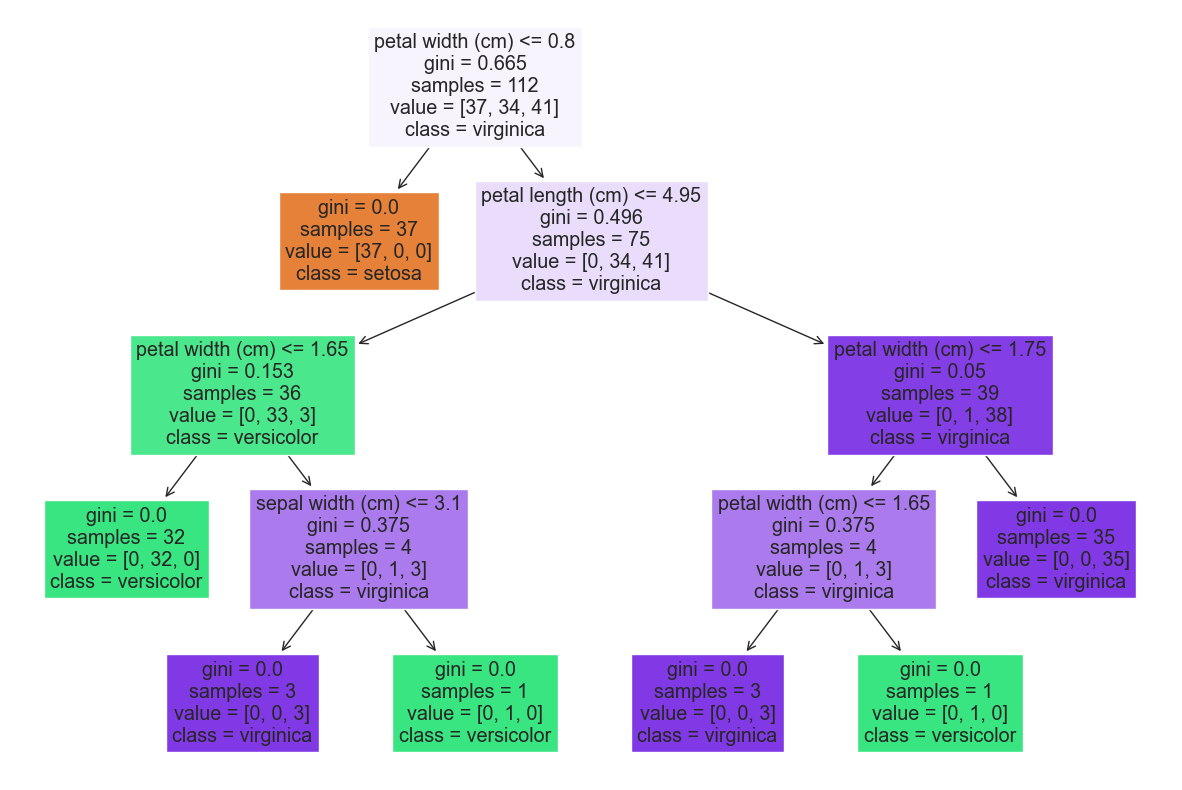

In [49]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names.tolist(),  
                   filled=True)